# Análise do valor do dolar ao longo dos anos em diferentes países

## Authors: 
### Gabriel Borges
### Isabelle Oliveira

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import geopandas as gpd
import matplotlib as mpl
def legenda_format():
    return plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5),  prop={'size': 15})


In [2]:
dfusd = pd.read_csv('daily.csv')

In [3]:
 world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

## Visualizando dados importados

In [4]:
dfusd.head()

,Date,Country,Exchange rate
0,1971-01-04,Australia,0.898715
1,1971-01-05,Australia,0.898311
2,1971-01-06,Australia,0.897666
3,1971-01-07,Australia,0.897827
4,1971-01-08,Australia,0.898957


## Listando colunas do arquivo

In [5]:
dfusd.columns

Index(['Date', 'Country', 'Exchange rate'], dtype='object')

## Informações dos dados

In [6]:
dfusd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229136 entries, 0 to 229135
Data columns (total 3 columns):
Date             229136 non-null object
Country          229136 non-null object
Exchange rate    220358 non-null float64
dtypes: float64(1), object(2)
memory usage: 5.2+ MB


### Descrição da coluna "Exchange rate" 

In [7]:
dfusd.describe()

,Exchange rate
count,220358.000000
mean,109.433126
std,2483.051230
min,0.169700
25%,1.426000
50%,5.419900
75%,9.975000
max,248209.921900


# Retirando linhas vazias

In [8]:
dfusd.dropna(inplace = True)
dfusd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220358 entries, 0 to 229135
Data columns (total 3 columns):
Date             220358 non-null object
Country          220358 non-null object
Exchange rate    220358 non-null float64
dtypes: float64(1), object(2)
memory usage: 6.7+ MB


### Formatando o tipo da coluna 'Date'

In [9]:
dfusd['Date'] = pd.to_datetime(dfusd['Date'],
                              format='%Y %m %d')
print(dfusd['Date'].dtypes)


datetime64[ns]


## Lista de países

In [10]:
listC = list(set(dfusd['Country']))

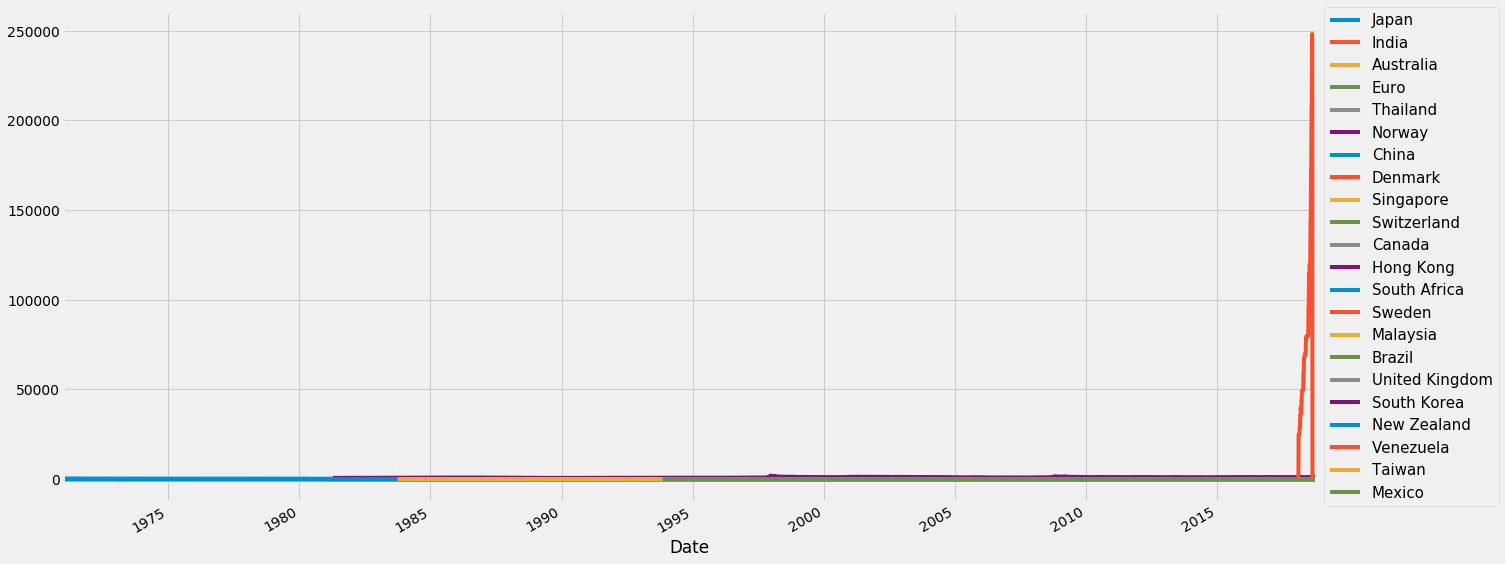

In [11]:
plt.style.use('fivethirtyeight')
for c in listC:
    dfusd[dfusd['Country'] == c].plot(kind= 'line', x = 'Date', y= 'Exchange rate', label = c,
                                      ax = plt.gca(), figsize = (20,10))
legenda_format()
plt.show()

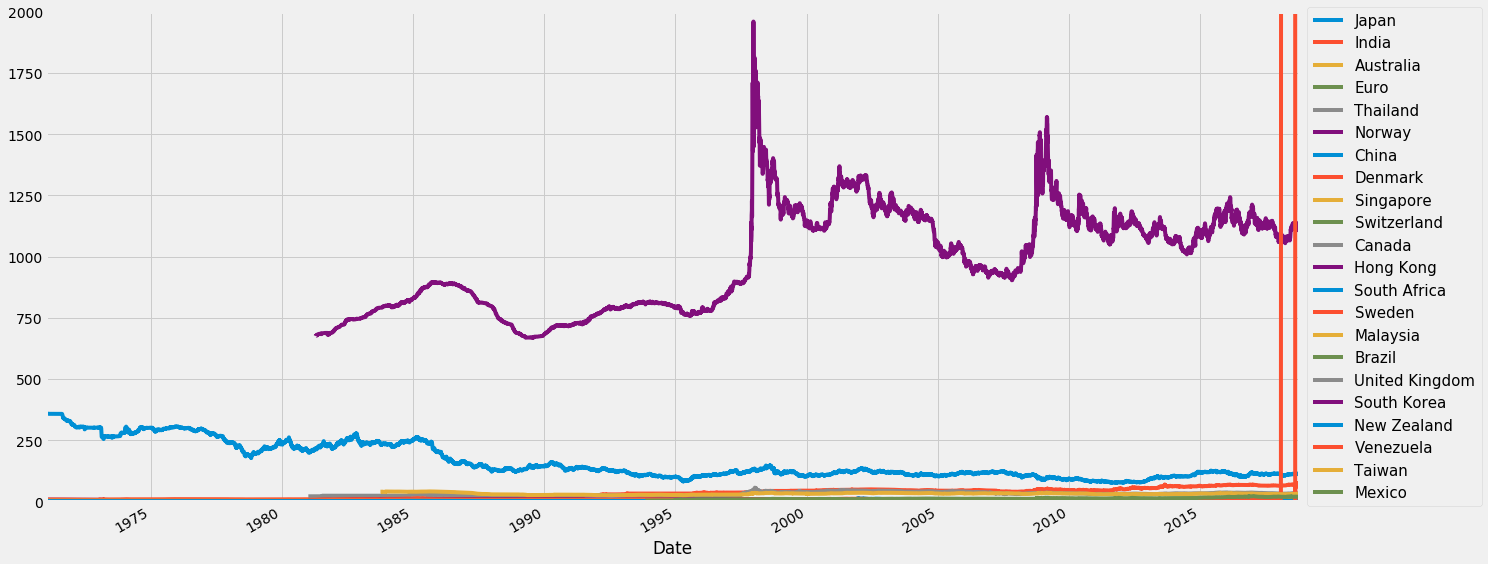

In [12]:
plt.style.use('fivethirtyeight')
for c in listC:
    dfusd[dfusd['Country'] == c].plot(kind= 'line', x = 'Date', y= 'Exchange rate', label = c,
                                      ax = plt.gca(), figsize = (20,10),
                                     ylim =(0, 2000))
legenda_format()
plt.show()

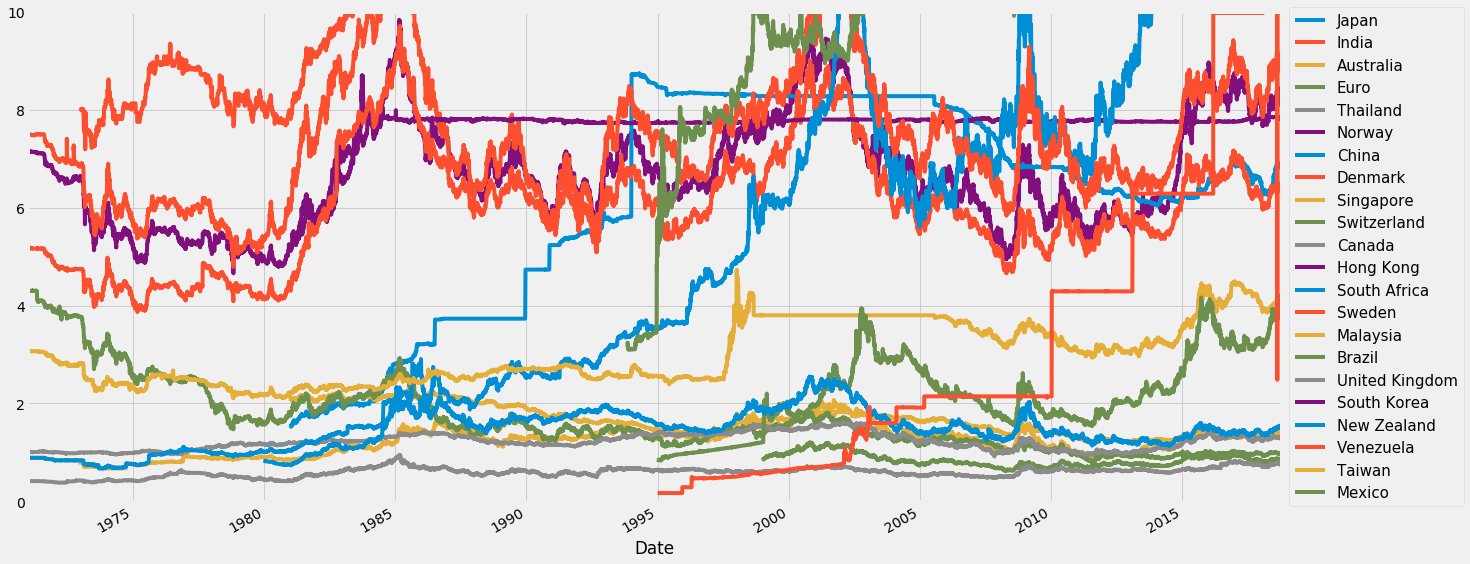

In [13]:
plt.style.use('fivethirtyeight')
for c in listC:
    dfusd[dfusd['Country'] == c].plot(kind= 'line', x = 'Date', y= 'Exchange rate', label = c,
                                      ax = plt.gca(), figsize = (20,10),
                                     ylim =(0, 10))
legenda_format()
plt.show()

# Variação do dólar em cada país (2018)

In [14]:
df = pd.DataFrame({'Country':listC, 'Min':[0 for x in listC], 'Max': [0 for x in listC]})

In [15]:
for c, group in dfusd[dfusd['Date'].dt.year == 2018].groupby('Country'):
    df.loc[df['Country'] == c, 'Min'] = round(group['Exchange rate'].min(), 3)
    df.loc[df['Country'] == c, 'Max'] = round(group['Exchange rate'].max(), 3)
df['Diff'] = df['Max'] - df['Min']
df['DiffMax'] = (df['Diff']  / df['Max']) *100

In [16]:
print(df.sort_values('DiffMax',ascending  = False))

           Country       Min         Max        Diff    DiffMax
19       Venezuela     2.482  248209.922  248207.440  99.999000
12    South Africa    11.550      15.472       3.922  25.349018
15          Brazil     3.147       4.202       1.055  25.107092
13          Sweden     7.855       9.223       1.368  14.832484
1            India    63.380      74.330      10.950  14.731602
18     New Zealand     1.350       1.553       0.203  13.071475
21          Mexico    17.970      20.670       2.700  13.062409
2        Australia     1.234       1.419       0.185  13.037350
16  United Kingdom     0.698       0.788       0.090  11.421320
6            China     6.265       6.933       0.668   9.635079
5           Norway     7.667       8.475       0.808   9.533923
7          Denmark     5.961       6.579       0.618   9.393525
3             Euro     0.801       0.882       0.081   9.183673
0            Japan   104.830     114.190       9.360   8.196865
9      Switzerland     0.923       1.004

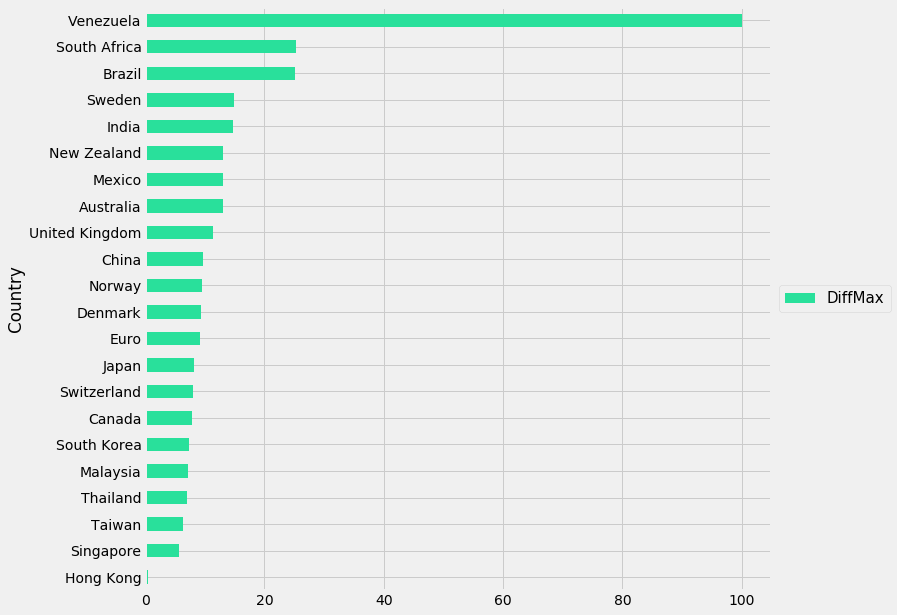

In [17]:
plt.style.use('fivethirtyeight')
df.sort_values('DiffMax',ascending = True).plot(kind='barh',x='Country', y='DiffMax', 
                                                   figsize=(10,10), color = '#29E09B')
legenda_format()
plt.show()

In [18]:
world = pd.merge(world, df,how = 'left', left_on='name', right_on='Country')
world.columns
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Country,Min,Max,Diff,DiffMax
0,920938,Oceania,Fiji,FJI,8374.0,"(POLYGON ((180 -16.06713266364245, 180 -16.555...",NaN,NaN,NaN,NaN,NaN
1,53950935,Africa,Tanzania,TZA,150600.0,POLYGON ((33.90371119710453 -0.950000000000000...,NaN,NaN,NaN,NaN,NaN
2,603253,Africa,W. Sahara,ESH,906.5,POLYGON ((-8.665589565454809 27.65642588959236...,NaN,NaN,NaN,NaN,NaN
3,35623680,North America,Canada,CAN,1674000.0,"(POLYGON ((-122.84 49.00000000000011, -122.974...",Canada,1.228,1.332,0.104,7.807808
4,326625791,North America,United States of America,USA,18560000.0,"(POLYGON ((-122.84 49.00000000000011, -120 49....",NaN,NaN,NaN,NaN,NaN


In [19]:
world["pop_est_NAN"] = world.DiffMax.apply(lambda x: x if x >= 0 else np.nan)

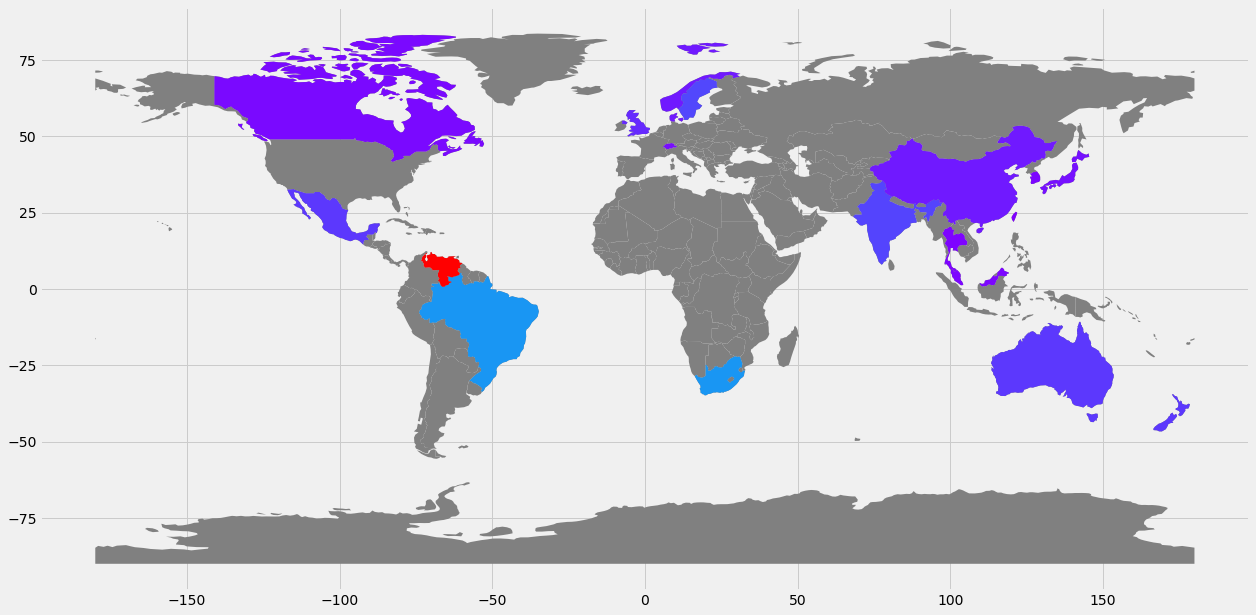

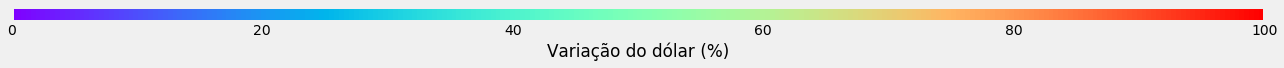

In [20]:
ax = world.plot(color="grey",figsize = (20,10))
plt.style.use('fivethirtyeight')
world.dropna().plot(ax=ax, column='DiffMax', figsize = (20,10), cmap = 'rainbow')
fig, ax = plt.subplots(figsize=(20, 0.5))
fig.subplots_adjust(bottom=0.5)

cmap = mpl.cm.rainbow
norm = mpl.colors.Normalize(vmin=0, vmax=100)

cb1 = mpl.colorbar.ColorbarBase(ax, cmap=cmap,
                                norm=norm,
                                orientation='horizontal')
cb1.set_label('Variação do dólar (%)')
plt.show()

# Média do valor do dolar em cada país (2018)

#### (Venezuela e Córeia do sul foram retiradas por terem valores desproprocionais ao restante do gráfico)

In [21]:
dfusd[dfusd['Date'].dt.year == 2018].groupby('Country').mean().sort_values(by= 'Exchange rate', ascending = False)

,Exchange rate
Country,
Venezuela,57433.190937
South Korea,1092.237071
Japan,109.808081
India,67.473030
Thailand,32.166566
Taiwan,29.949545
Mexico,19.024005
South Africa,12.971767
Sweden,8.603287


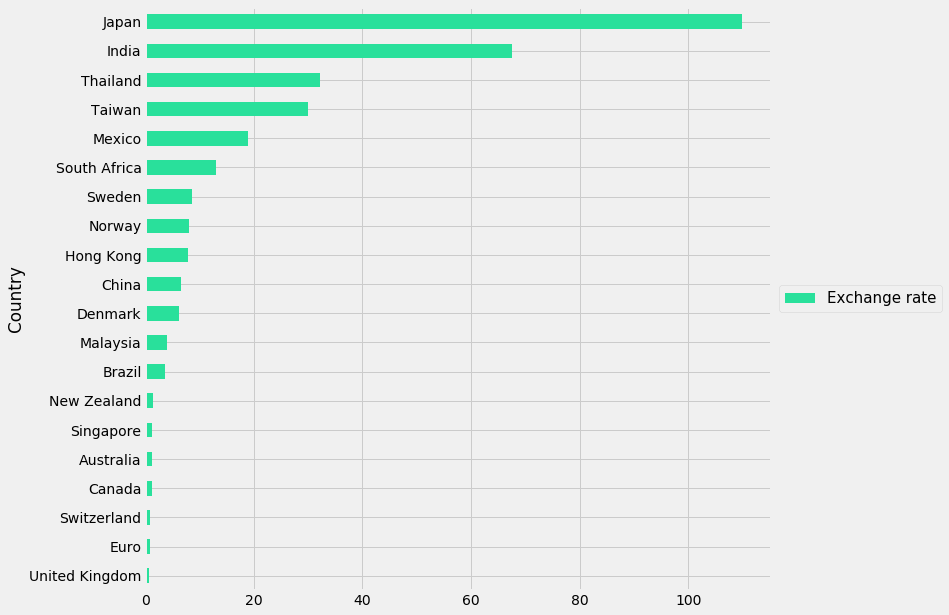

In [22]:
dfusd2 = dfusd[dfusd['Date'].dt.year == 2018]
dfusd2 = dfusd2[dfusd2['Country'] != 'Venezuela']
dfusd2 = dfusd2[dfusd2['Country'] != 'South Korea']
dfusd2.groupby('Country').mean().sort_values(by = 'Exchange rate',ascending = True).plot(
    kind = 'barh', figsize = (10, 10), color = '#29E09B')
legenda_format()
plt.show()

In [23]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = pd.merge(world, dfusd2.groupby('Country').mean() ,how = 'left', left_on='name', right_on='Country')
world.columns
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Exchange rate
0,920938,Oceania,Fiji,FJI,8374.0,"(POLYGON ((180 -16.06713266364245, 180 -16.555...",NaN
1,53950935,Africa,Tanzania,TZA,150600.0,POLYGON ((33.90371119710453 -0.950000000000000...,NaN
2,603253,Africa,W. Sahara,ESH,906.5,POLYGON ((-8.665589565454809 27.65642588959236...,NaN
3,35623680,North America,Canada,CAN,1674000.0,"(POLYGON ((-122.84 49.00000000000011, -122.974...",1.288111
4,326625791,North America,United States of America,USA,18560000.0,"(POLYGON ((-122.84 49.00000000000011, -120 49....",NaN


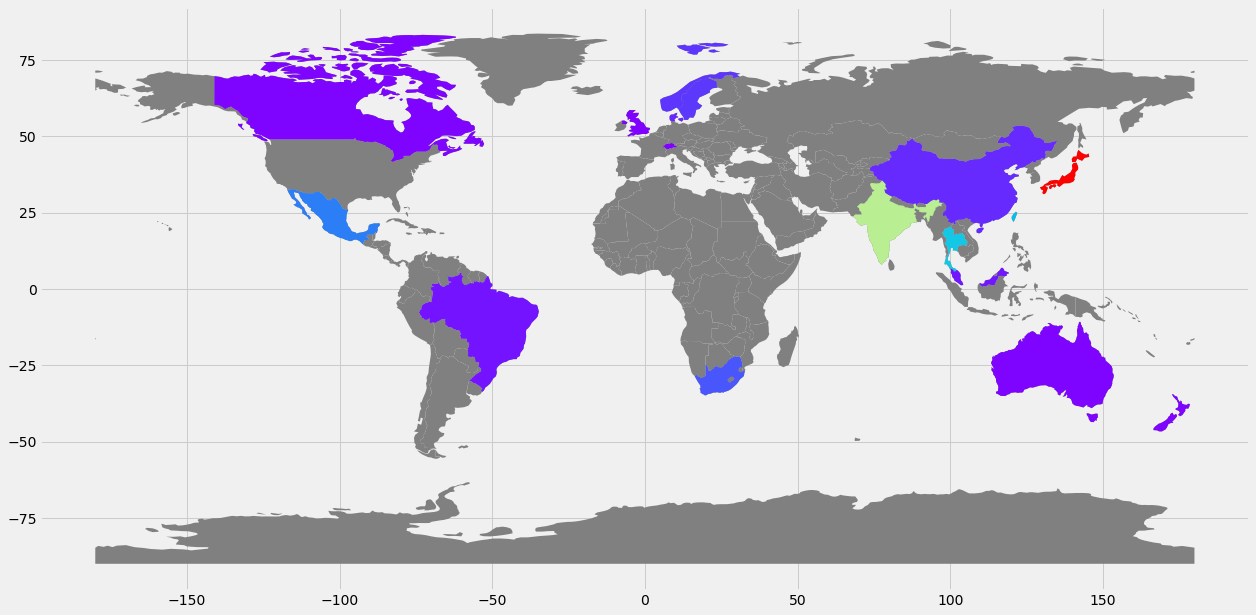

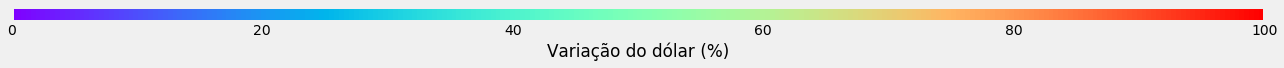

In [24]:
ax = world.plot(color="grey",figsize = (20,10))
plt.style.use('fivethirtyeight')
world.dropna().plot(ax=ax, column='Exchange rate', figsize = (20,10), cmap = 'rainbow')
fig, ax = plt.subplots(figsize=(20, 0.5))
fig.subplots_adjust(bottom=0.5)

cmap = mpl.cm.rainbow
norm = mpl.colors.Normalize(vmin=0, vmax=100)

cb1 = mpl.colorbar.ColorbarBase(ax, cmap=cmap,
                                norm=norm,
                                orientation='horizontal')
cb1.set_label('Variação do dólar (%)')
plt.show()

## Crise econômica de 2007-2008

In [25]:
list2008 = list(set( dfusd.loc[(dfusd['Date'].dt.year <= 2009) &
                    (dfusd['Date'].dt.year >= 2006) &
                    (dfusd['Exchange rate'] <= 4), 
                    'Country']))
print(list2008)

['New Zealand', 'Malaysia', 'Singapore', 'Switzerland', 'Brazil', 'Australia', 'Euro', 'Canada', 'Venezuela', 'United Kingdom']


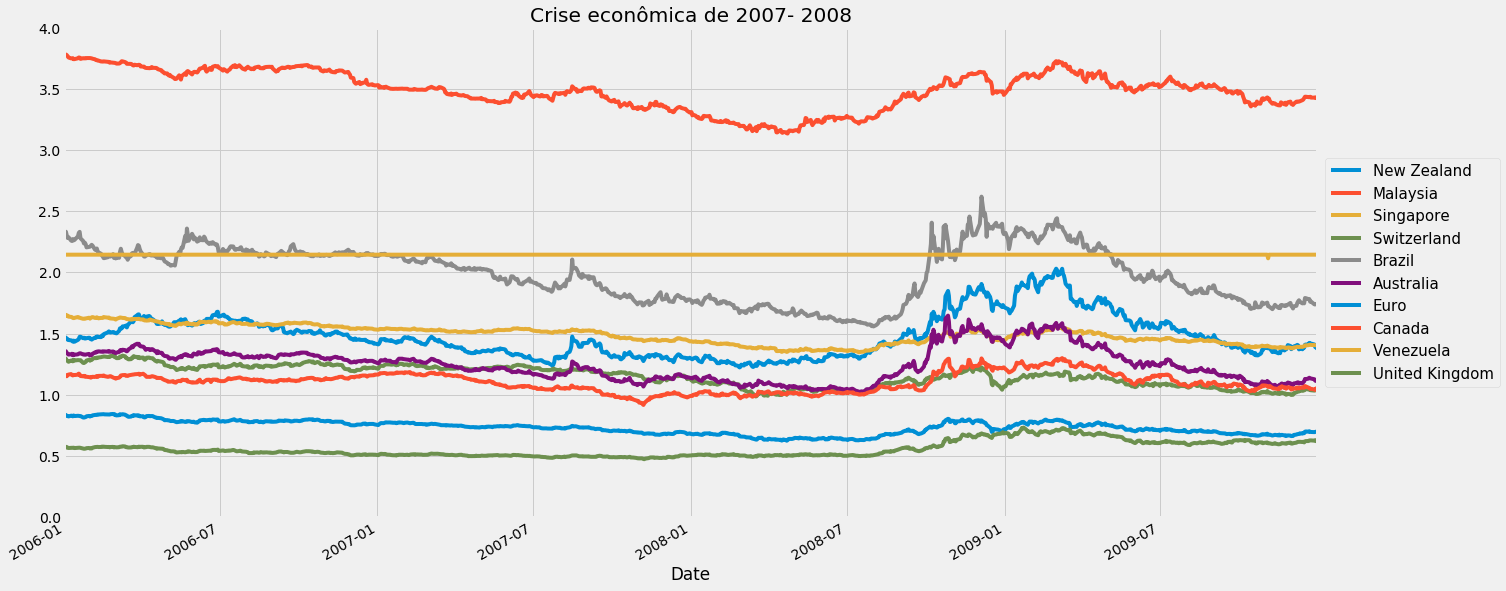

In [26]:
plt.style.use('fivethirtyeight')
for c in list2008:
    dfusd[dfusd['Country'] == c].plot(kind= 'line', x = 'Date', y= 'Exchange rate', label = c, 
                                      title = 'Crise econômica de 2007- 2008',
                                      ax = plt.gca(), figsize = (20,10), 
                                      ylim = (0, 4)).set_xlim(left= dt.datetime(2006,1,1), 
                                                              right= dt.datetime(2009,12,31))
legenda_format()
plt.show()

## 11 de Setembro

In [27]:
list11set = list(set( dfusd.loc[(dfusd['Date'].dt.year >= 2001) &
                    (dfusd['Date'].dt.year <= 2002) &
                    (dfusd['Exchange rate'] <= 12.5), 
                    'Country']))
print(list2008)

['New Zealand', 'Malaysia', 'Singapore', 'Switzerland', 'Brazil', 'Australia', 'Euro', 'Canada', 'Venezuela', 'United Kingdom']


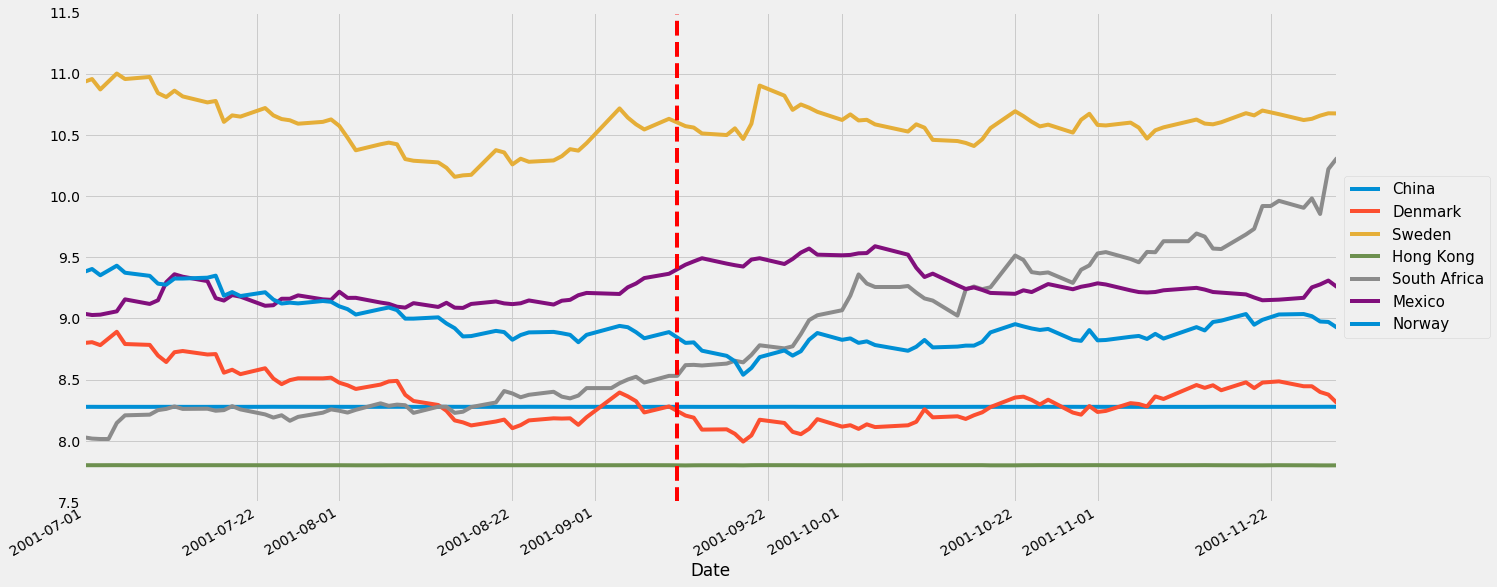

In [28]:
plt.style.use('fivethirtyeight')
list11set = list(set( dfusd.loc[(dfusd['Date'].dt.year >= 2001) &
                    (dfusd['Date'].dt.year <= 2002) &
                    (dfusd['Exchange rate'] <= 11.5)&
                    (dfusd['Exchange rate'] >= 7.5), 
                    'Country']))
for c in list11set:
    dfusd[dfusd['Country'] == c].plot(kind= 'line', x = 'Date', y= 'Exchange rate', label = c,
                                      ax = plt.gca(), figsize = (20,10), 
                                      ylim = (7.5, 11.5)).set_xlim(left=dt.datetime(2001,7,1), 
                                                                   right=dt.datetime(2001,11,30))
plt.axvline(dt.datetime(2001,9,11), c = 'red', ls = '--')
legenda_format()
plt.show()

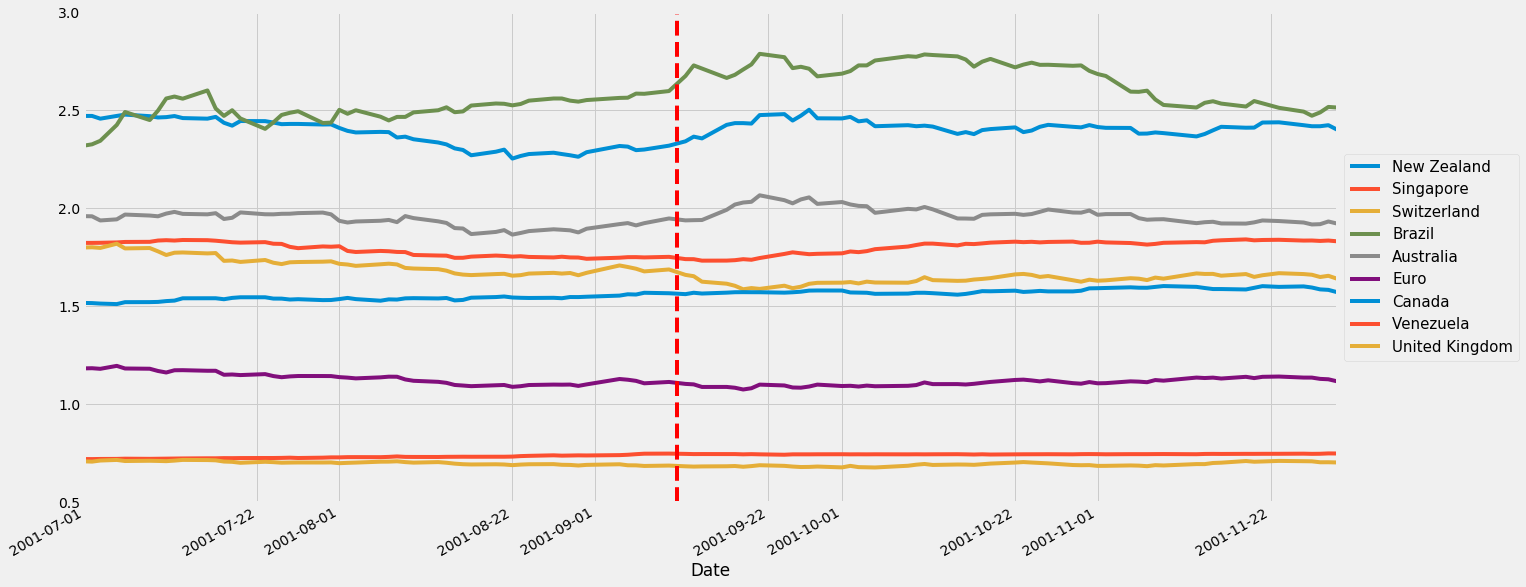

In [29]:
plt.style.use('fivethirtyeight')
list11set = list(set( dfusd.loc[(dfusd['Date'].dt.year >= 2001) &
                    (dfusd['Date'].dt.year <= 2002) &
                    (dfusd['Exchange rate'] <= 3), 
                    'Country']))
for c in list11set:
    dfusd[dfusd['Country'] == c].plot(kind= 'line', x = 'Date', y= 'Exchange rate', label = c,
                                      ax = plt.gca(), figsize = (20,10), 
                                      ylim = (0.5, 3)).set_xlim(left=dt.datetime(2001,7,1), 
                                                                right=dt.datetime(2001,11,30))
plt.axvline(dt.datetime(2001,9,11), c = 'red', ls = '--')
legenda_format()
plt.show()

## Tigres asiáticos

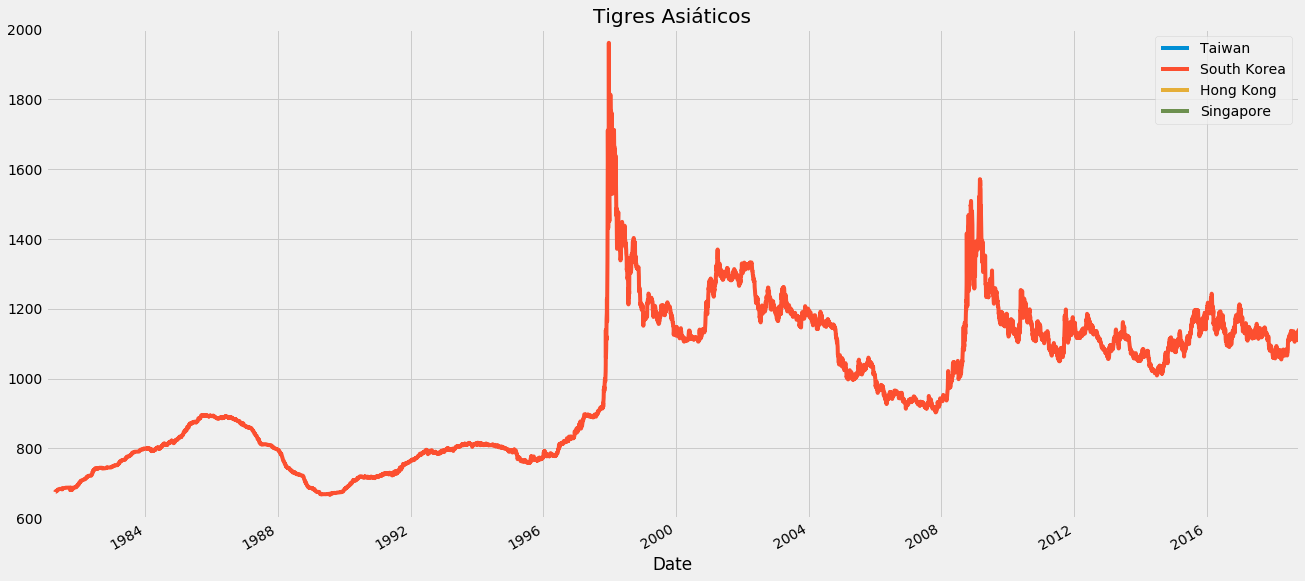

In [30]:
plt.style.use('fivethirtyeight')
listTigers = ['Taiwan', 'South Korea', 'Hong Kong', 'Singapore']
for c in listTigers:
    dfusd[dfusd['Country'] == c].plot(kind= 'line', x = 'Date', y= 'Exchange rate', label = c, 
                                      title = 'Tigres Asiáticos',
                                      ax = plt.gca(), figsize = (20,10), 
                                      ylim = (600, 2000))
plt.show()

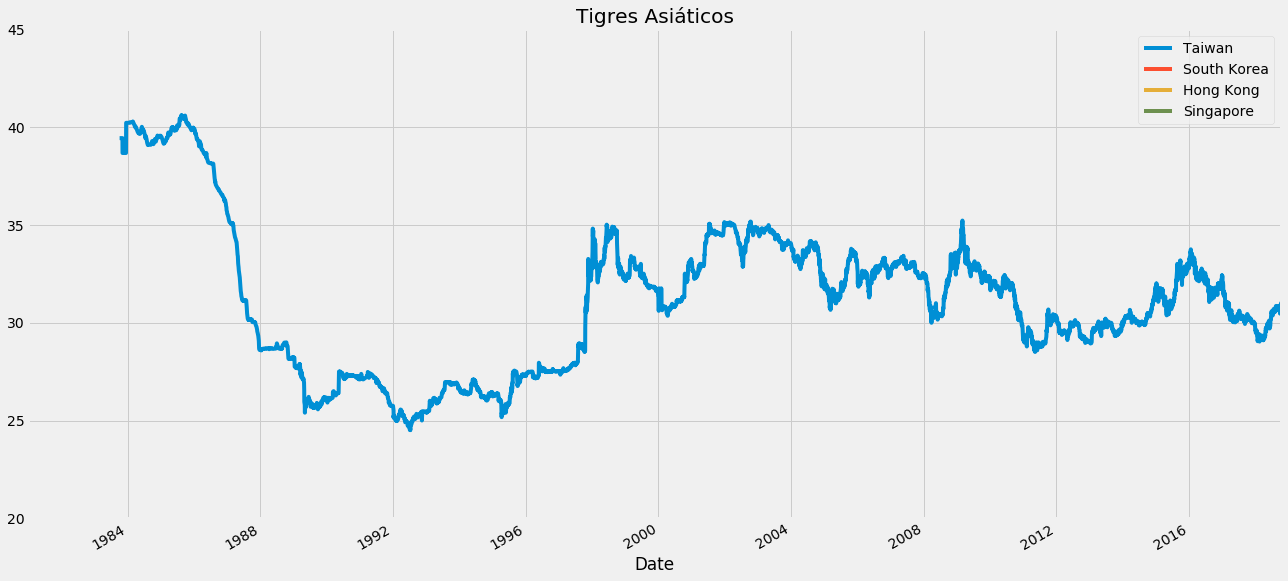

In [31]:
plt.style.use('fivethirtyeight')
for c in listTigers:
    dfusd[dfusd['Country'] == c].plot(kind= 'line', x = 'Date', y= 'Exchange rate', label = c, 
                                      title = 'Tigres Asiáticos',
                                      ax = plt.gca(), figsize = (20,10), 
                                      ylim =(20, 45))

#### O governo de Hong Kong tem um plano de controle do preço do dólar.

https://translate.google.com/translate?hl=pt-BR&sl=en&u=https://www.hkma.gov.hk/eng/key-functions/monetary-stability/linked-exchange-rate-system.shtml&prev=search

##### (Site do governo de Hong Kong explicando o controle do preço da moeda americana)

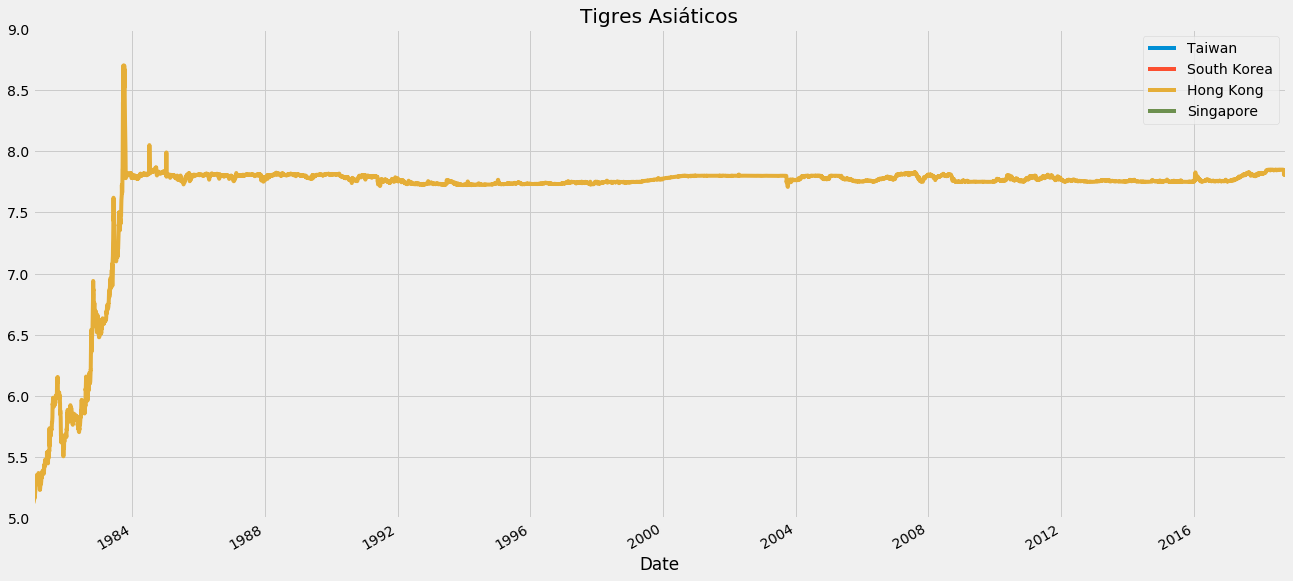

In [32]:
plt.style.use('fivethirtyeight')
for c in listTigers:
    dfusd[dfusd['Country'] == c].plot(kind= 'line', x = 'Date', y= 'Exchange rate', label = c, 
                                      title = 'Tigres Asiáticos',
                                      ax = plt.gca(), figsize = (20,10), 
                                      ylim = (5, 9))

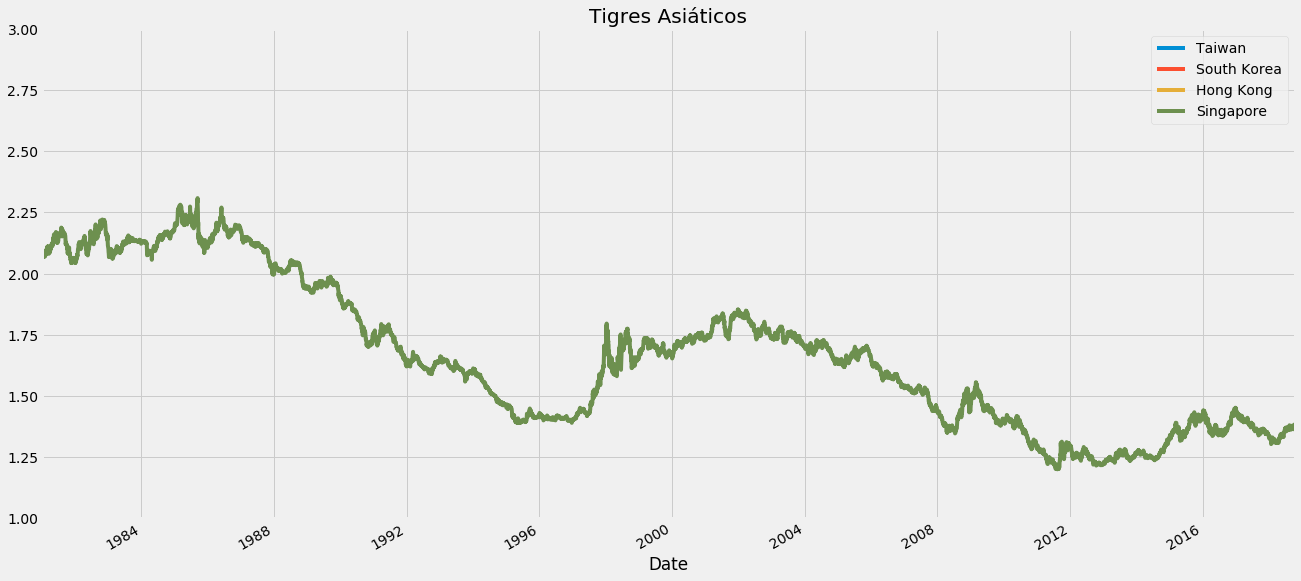

In [33]:
plt.style.use('fivethirtyeight')
for c in listTigers:
    dfusd[dfusd['Country'] == c].plot(kind= 'line', x = 'Date', y= 'Exchange rate', label = c, title = 'Tigres Asiáticos',
                                      ax = plt.gca(), figsize = (20,10), 
                                      ylim = (1, 3))

## Aumento do preço dolar na Venezuela (2017-2018)

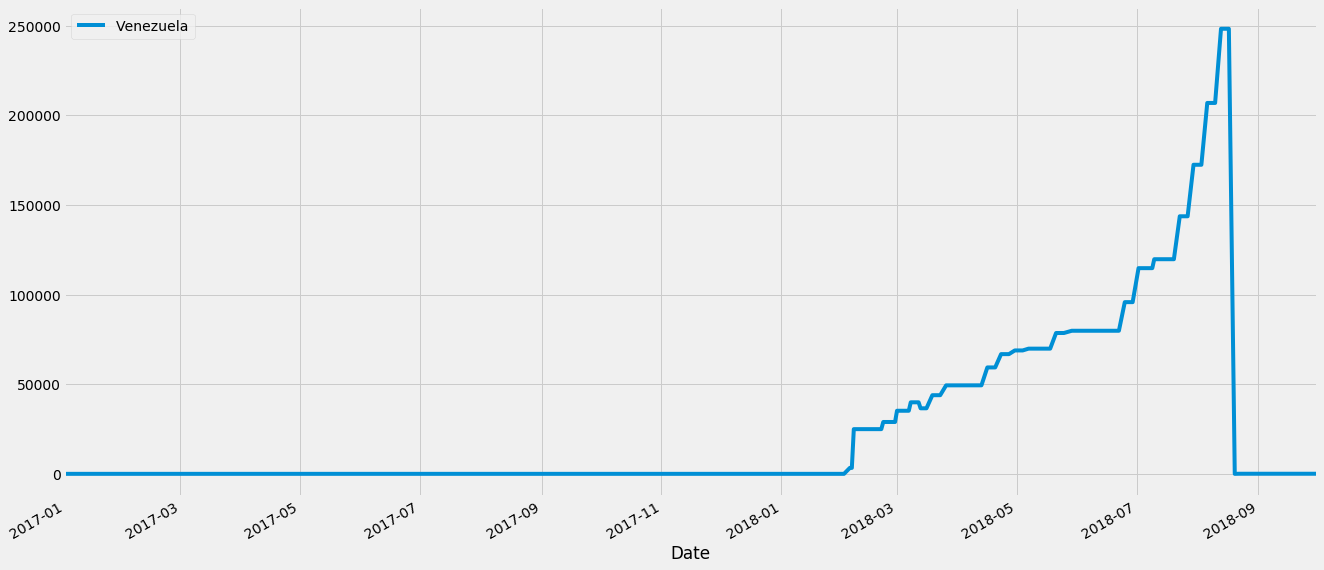

In [34]:
plt.style.use('fivethirtyeight')
dfusd[dfusd['Country'] == 'Venezuela'].plot(kind= 'line', x = 'Date', y= 'Exchange rate', label = 'Venezuela',
                                      ax = plt.gca(), figsize = (20,10)
                                      ).set_xlim(left=dt.datetime(2017,1,1), right=dt.datetime(2018,10,1))
plt.show()

#### A queda brusca entre os meses de agosto e outubro representa a mudança da moeda no país


https://br.cointelegraph.com/news/venezuela-s-new-petro-backed-national-currency-to-start-circulating-in-august
##### (Dados encontrados depois de pesquisas sobre a moeda venezuelana com a restição de tempo durante o período de queda do dolar na Venezuela)

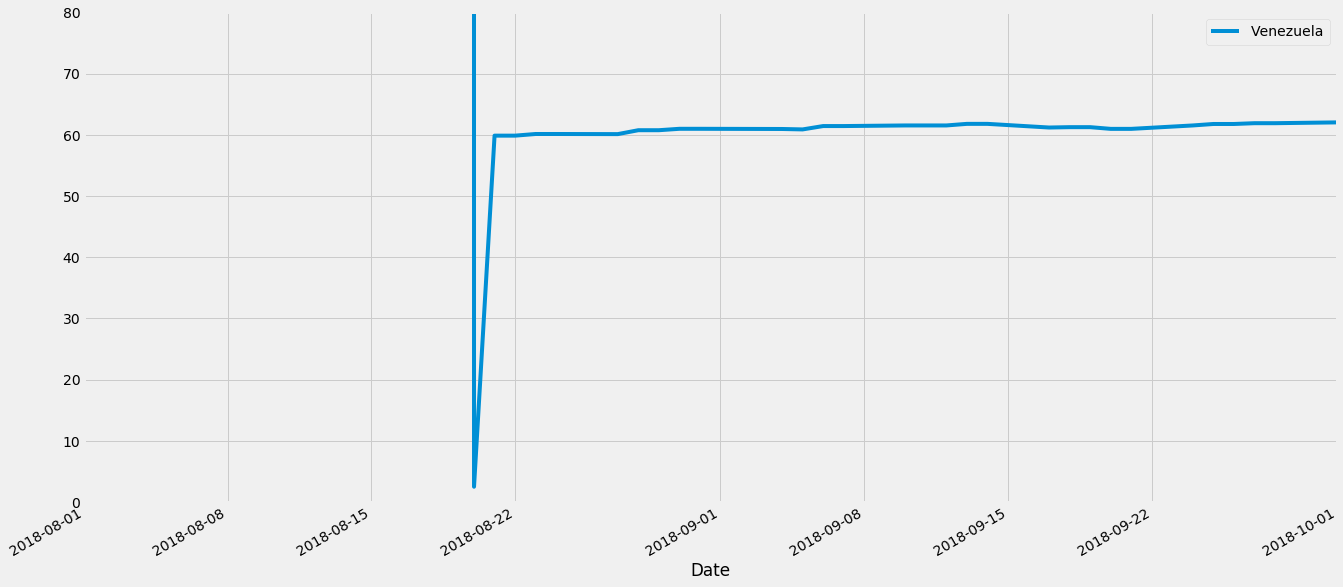

In [35]:
plt.style.use('fivethirtyeight')
dfusd[dfusd['Country'] == 'Venezuela'].plot(kind= 'line', x = 'Date', y= 'Exchange rate', label = 'Venezuela',
                                      ax = plt.gca(), figsize = (20,10), ylim = (0, 80)
                                      ).set_xlim(left=dt.datetime(2018,8,1), right=dt.datetime(2018,10,1))
plt.show()

# Variação do dólar nos países ecônomicamente mais livres do mundo 

In [36]:
listLivres = ['Hong Kong', 'Singapore', 'New Zealand', 'Switzerland', 'Australia']

print(listLivres)

['Hong Kong', 'Singapore', 'New Zealand', 'Switzerland', 'Australia']


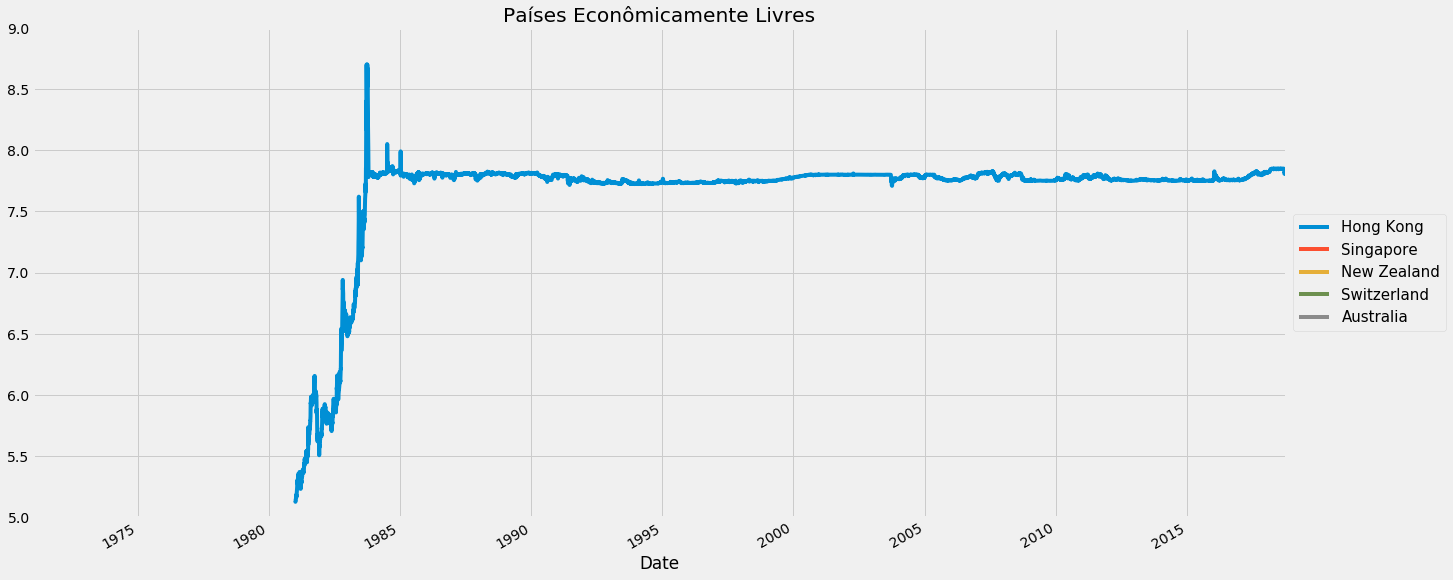

In [37]:
plt.style.use('fivethirtyeight')
for c in listLivres:
    dfusd[dfusd['Country'] == c].plot(kind= 'line', x = 'Date', y= 'Exchange rate', label = c, 
                                      title = 'Países Econômicamente Livres',
                                      ax = plt.gca(), figsize = (20,10), 
                                     ylim = (5, 9))
legenda_format()
plt.show()

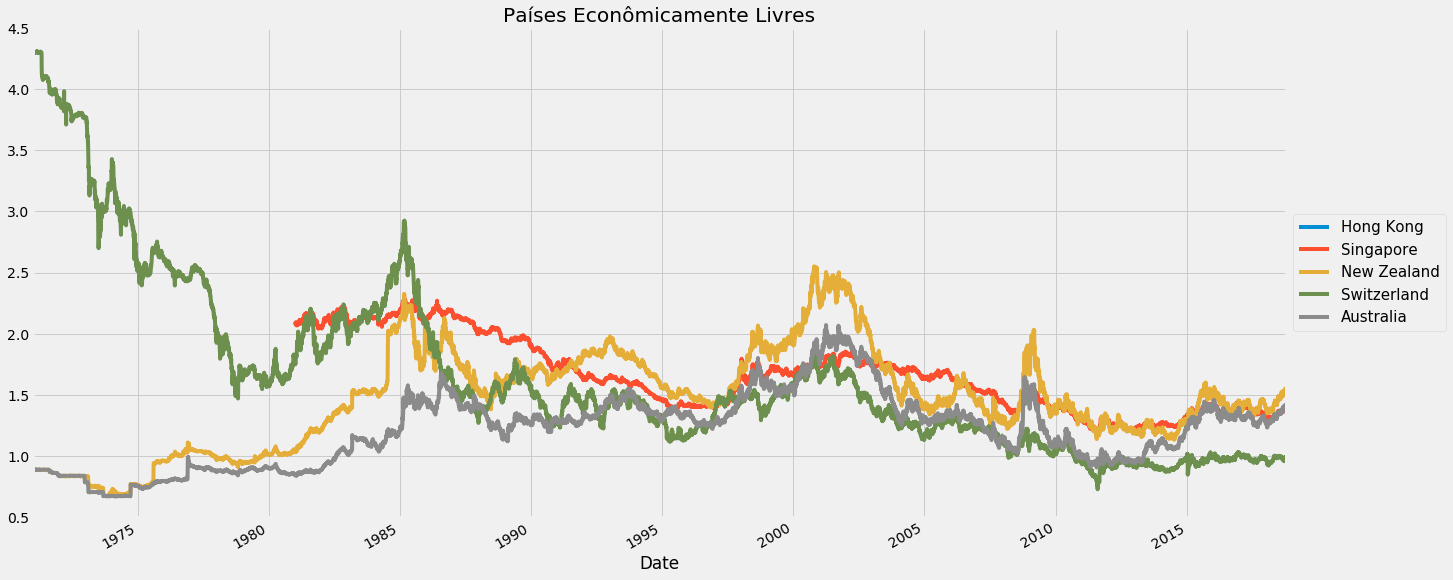

In [38]:
plt.style.use('fivethirtyeight')
for c in listLivres:
    dfusd[dfusd['Country'] == c].plot(kind= 'line', x = 'Date', y= 'Exchange rate', label = c, 
                                      title = 'Países Econômicamente Livres',
                                      ax = plt.gca(), figsize = (20,10), 
                                     ylim = (0.5, 4.5))
legenda_format()
plt.show()

# Variação do dólar nos países ecônomicamente menos livres do mundo 

In [39]:
listNaoLivres = ['Brazil', 'India', 'South Africa', 'China']

print(listNaoLivres)

['Brazil', 'India', 'South Africa', 'China']


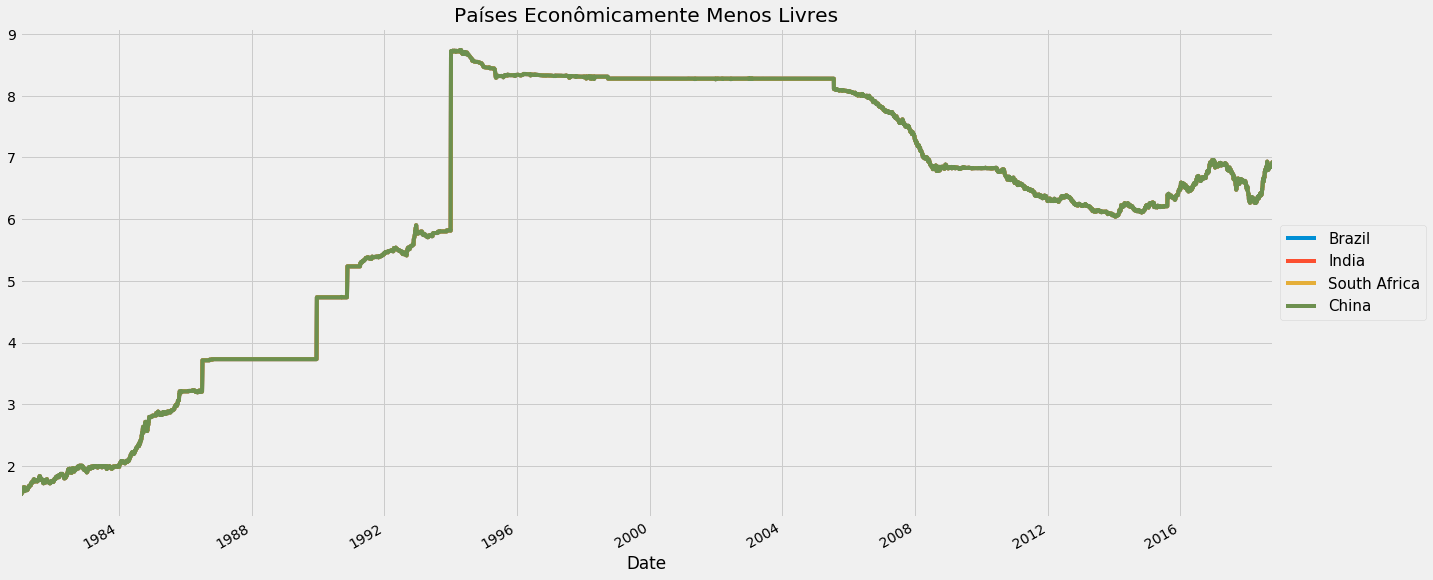

In [40]:
plt.style.use('fivethirtyeight')
for c in listNaoLivres:
    dfusd[dfusd['Country'] == 'China'].plot(kind= 'line', x = 'Date', y= 'Exchange rate', label = c, 
                                      title = 'Países Econômicamente Menos Livres',
                                      ax = plt.gca(), figsize = (20,10))
legenda_format()
plt.show()

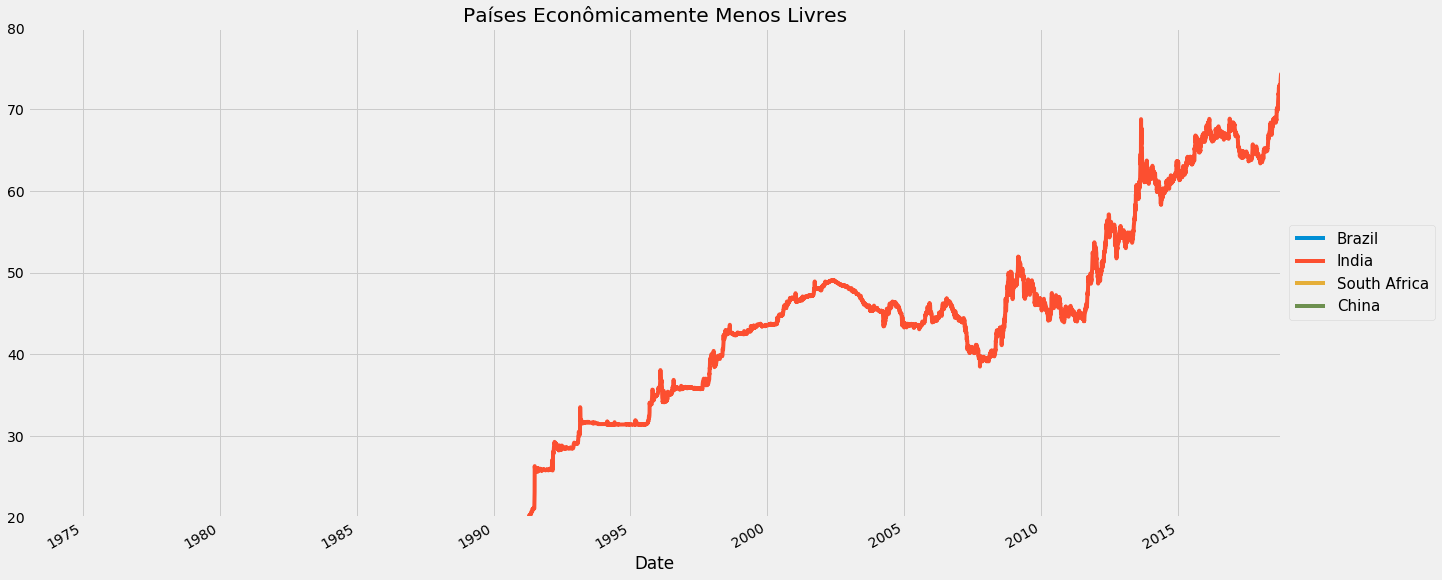

In [41]:
plt.style.use('fivethirtyeight')
for c in listNaoLivres:
    dfusd[dfusd['Country'] == c].plot(kind= 'line', x = 'Date', y= 'Exchange rate', label = c, 
                                      title = 'Países Econômicamente Menos Livres',
                                      ylim =(20, 80),
                                      ax = plt.gca(), figsize = (20,10))
legenda_format()
plt.show()

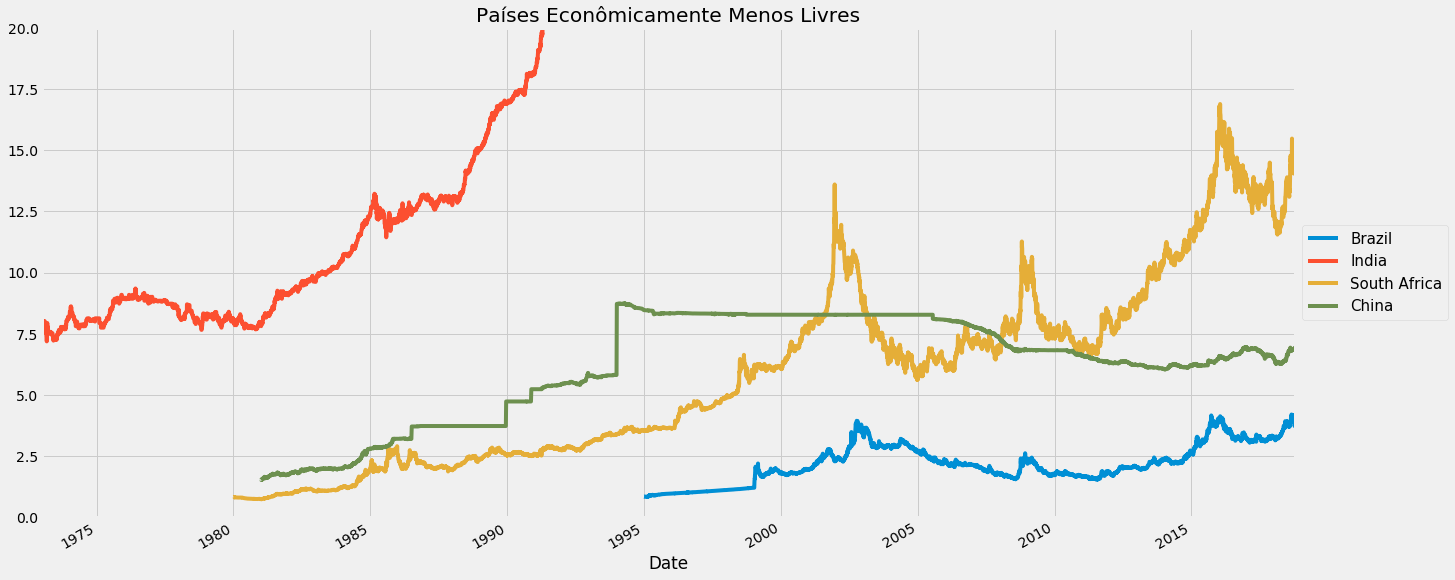

In [42]:
plt.style.use('fivethirtyeight')
for c in listNaoLivres:
    dfusd[dfusd['Country'] == c].plot(kind= 'line', x = 'Date', y= 'Exchange rate', label = c, 
                                      title = 'Países Econômicamente Menos Livres',
                                      ylim = (0, 20),
                                      ax = plt.gca(), figsize = (20,10))
legenda_format()
plt.show()

# Brasil

### Variação da moeda durante o governo Lula

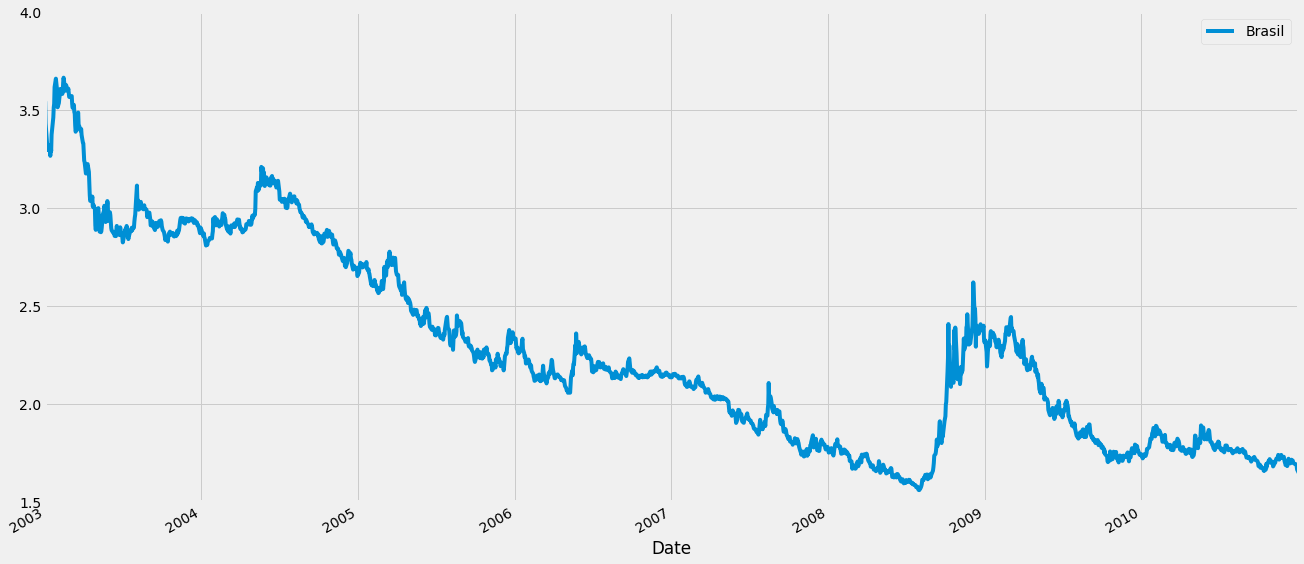

In [43]:
plt.style.use('fivethirtyeight')
dfusd[dfusd['Country'] == 'Brazil'].plot(kind= 'line', x = 'Date', y= 'Exchange rate', label = 'Brasil',
                                      ax = plt.gca(), figsize = (20,10), 
                                         ylim = (1.5, 4.00)).set_xlim(left=dt.datetime(2003,1,1), 
                                                                    right=dt.datetime(2010,12,31))
plt.show()

### Variação da moeda durante o governo Dilma

#### Diferentemente do governo Lula, o dólar operou em alta nos 5 anos de governo Dilma.
https://economia.uol.com.br/cotacoes/noticias/redacao/2015/12/30/dolar-sobe-em-todos-5-anos-de-dilma-e-salta-137-de-r-1666-a-r-3948.htm

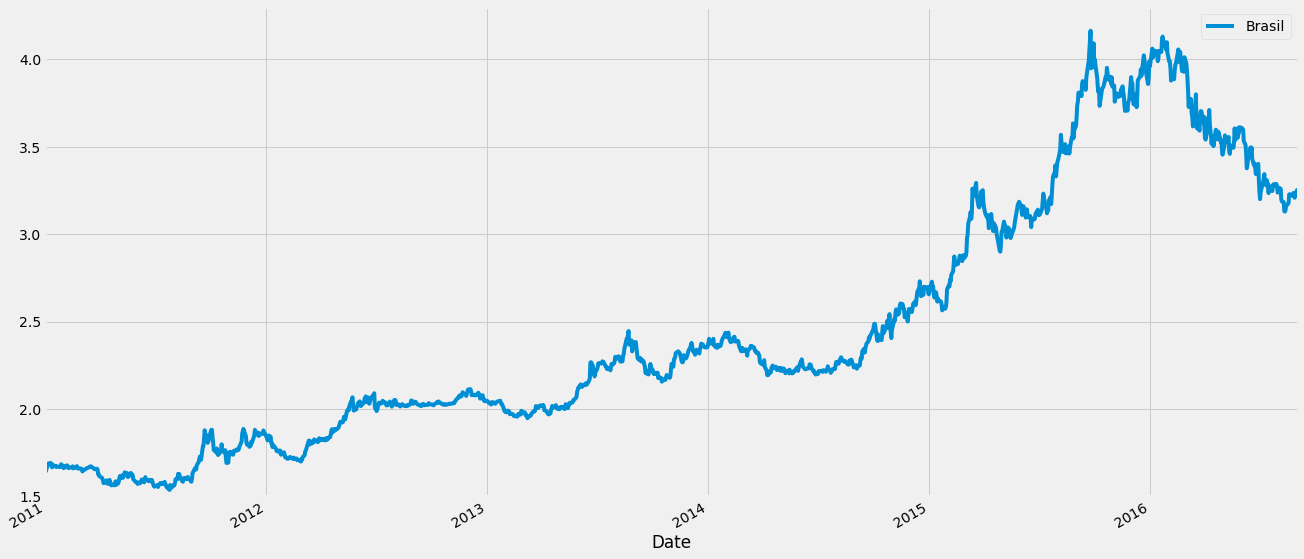

In [44]:
plt.style.use('fivethirtyeight')
dfusd[dfusd['Country'] == 'Brazil'].plot(kind= 'line', x = 'Date', y= 'Exchange rate', label = 'Brasil',
                                      ax = plt.gca(), figsize = (20,10), 
                                         ylim = (1.5, 4.30)).set_xlim(left=dt.datetime(2011,1,1), 
                                                                    right=dt.datetime(2016,8,31))
plt.show()

### Variação da moeda durante o governo Temer


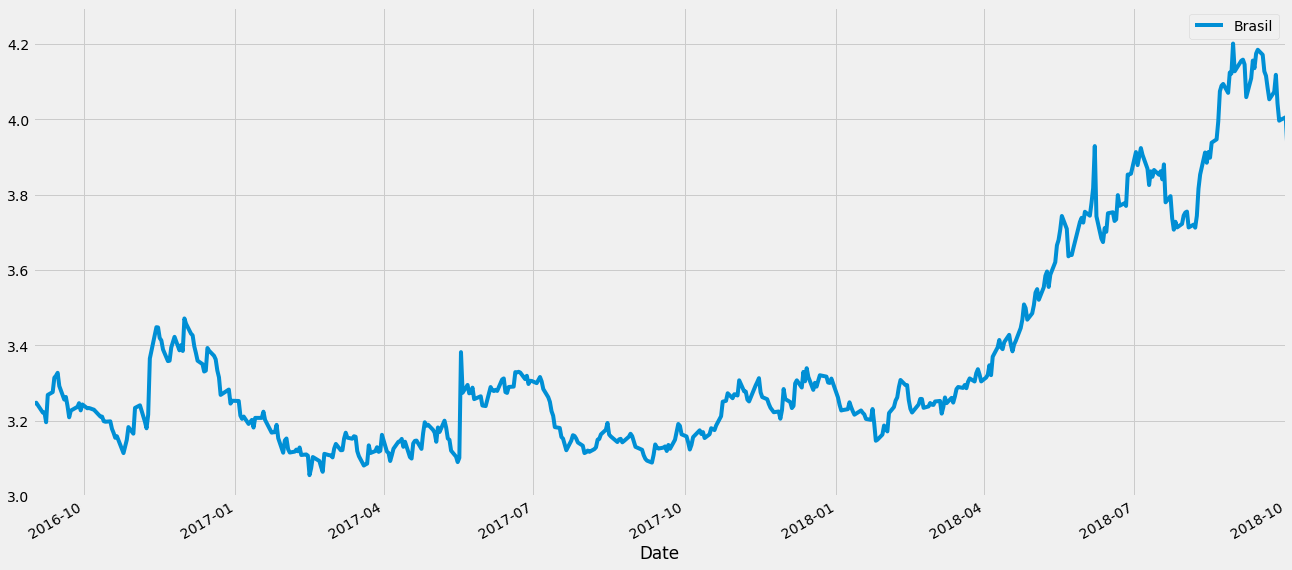

In [45]:
plt.style.use('fivethirtyeight')
dfusd[dfusd['Country'] == 'Brazil'].plot(kind= 'line', x = 'Date', y= 'Exchange rate', label = 'Brasil',
                                      ax = plt.gca(), figsize = (20,10), 
                                         ylim = (3, 4.30)).set_xlim(left=dt.datetime(2016,8,31), 
                                                                    right=dt.datetime(2018,10,1))
plt.show()